In [12]:
import torch
from torch import ones, zeros, eye, as_tensor, tensor, float32, Tensor
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from os import listdir

In [82]:
from gbi.benchmark.tasks.linear_gaussian.task import LinearGaussian
from gbi.benchmark.tasks.gaussian_mixture.task import GaussianMixture
from gbi.benchmark.tasks.uniform_1d.task import UniformNoise1D
from gbi.benchmark.tasks.two_moons.task import TwoMoonsGBI

In [3]:
from sbi.analysis import pairplot

In [4]:
import time
import IPython.display as IPd
from svgutils.compose import *
import svgutils.transform as sg

In [5]:
PANEL_A = "../svg/panel_a.svg"
PANEL_B = "../svg/panel_b.svg"
PANEL_C = "../svg/panel_c.svg"
PANEL_D = "../svg/panel_d.svg"

In [32]:
gt_dir = "../../../results/benchmark/ground_truths/"

### Uniform noise

In [88]:
task = UniformNoise1D()
prior = task.prior
lower = prior.support.base_constraint.lower_bound
upper = prior.support.base_constraint.upper_bound
limits = torch.stack([lower, upper]).T

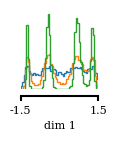

In [91]:
task = "uniform_1d"
betas = ["4","20","100"]
run_datetime = np.sort(listdir(f"{gt_dir}/{task}/"))[-1] # take latest
xo_info = (1, 'specified', 'unknown')

gt_samples = {}
for beta in betas:
    gt_path = f"{gt_dir}/{task}/{run_datetime}/beta_{beta}/obs_{xo_info[0]}_{xo_info[1]}_{xo_info[2]}"
    with open(gt_path + "/rejection_samples.pkl", "rb") as handle:
        gt_samples[beta] = pickle.load(handle)
        
with mpl.rc_context(fname="../../../.matplotlibrc"):
    _ = pairplot([gt_samples[beta] for beta in betas ], upper="contour", figsize=(1, 1), ticks=limits)
    # plt.savefig(PANEL_A, facecolor="None", transparent=True)

### Linear Gaussian

In [92]:
task = LinearGaussian()
prior = task.prior
lower = prior.mean - 3 * prior.stddev
upper = prior.mean + 3 * prior.stddev
limits = torch.stack([lower, upper]).T

/home/rdgao/Documents/code/research/neuralgbi/packages/sbi/sbi/analysis/plot.py:413: UserWarning: No contour levels were found within the data range.
  plt.contour(


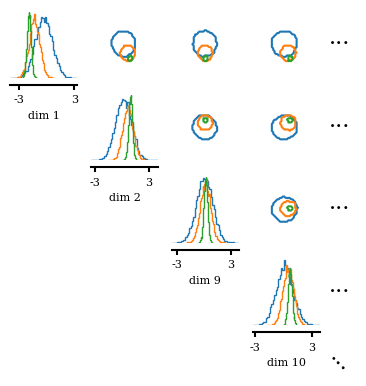

In [93]:
task = "linear_gaussian"
betas = ["0.1","1.0","10.0"]
run_datetime = np.sort(listdir(f"{gt_dir}/{task}/"))[-1] # take latest
xo_info = (0, 'specified', 'unknown')

gt_samples = {}
for beta in betas:
    gt_path = f"{gt_dir}/{task}/{run_datetime}/beta_{beta}/obs_{xo_info[0]}_{xo_info[1]}_{xo_info[2]}"
    with open(gt_path + "/rejection_samples.pkl", "rb") as handle:
        gt_samples[beta] = pickle.load(handle)
        
with mpl.rc_context(fname="../../../.matplotlibrc"):
    _ = pairplot([gt_samples[beta] for beta in betas ], upper="contour", figsize=(4, 4), ticks=limits, subset=[0, 1, 8, 9])
    # plt.savefig(PANEL_B, facecolor="None", transparent=True)

### Two moons

In [94]:
task = TwoMoonsGBI()
prior = task.prior
lower = prior.support.base_constraint.lower_bound
upper = prior.support.base_constraint.upper_bound
limits = torch.stack([lower, upper]).T

/home/rdgao/Documents/code/research/neuralgbi/packages/sbi/sbi/analysis/plot.py:413: UserWarning: No contour levels were found within the data range.
  plt.contour(


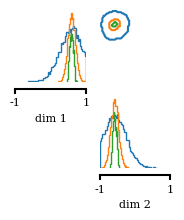

In [95]:
task = "two_moons"
betas = ["10","100","1000"]
run_datetime = np.sort(listdir(f"{gt_dir}/{task}/"))[-1] # take latest
xo_info = (4, 'specified', 'unknown')

gt_samples = {}
for beta in betas:
    gt_path = f"{gt_dir}/{task}/{run_datetime}/beta_{beta}/obs_{xo_info[0]}_{xo_info[1]}_{xo_info[2]}"
    with open(gt_path + "/rejection_samples.pkl", "rb") as handle:
        gt_samples[beta] = pickle.load(handle)
        
with mpl.rc_context(fname="../../../.matplotlibrc"):
    _ = pairplot([gt_samples[beta] for beta in betas ], upper="contour", figsize=(2, 2), ticks=limits)
    # plt.savefig(PANEL_C, facecolor="None", transparent=True)



### Gaussian Mixture

In [82]:
with open("../../../results/benchmark/ground_truths/gaussian_mixture/2023_01_18__11_37_59/beta_2.0/obs_0/rejection_samples.pkl", "rb") as handle:
    samples_2 = pickle.load(handle)
with open("../../../results/benchmark/ground_truths/gaussian_mixture/2023_01_18__11_37_59/beta_10.0/obs_0/rejection_samples.pkl", "rb") as handle:
    samples_10 = pickle.load(handle)
with open("../../../results/benchmark/ground_truths/gaussian_mixture/2023_01_18__11_37_59/beta_50.0/obs_0/rejection_samples.pkl", "rb") as handle:
    samples_50 = pickle.load(handle)

In [83]:
task = GaussianMixture()
prior = task.prior
lower = prior.support.base_constraint.lower_bound
upper = prior.support.base_constraint.upper_bound
limits = torch.stack([lower, upper]).T

/home/michael/Documents/neuralgbi_collection/neuralgbi/packages/sbi/sbi/analysis/plot.py:413: UserWarning: No contour levels were found within the data range.
  plt.contour(


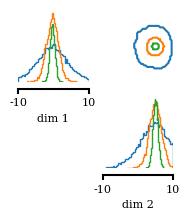

In [84]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    _ = pairplot([samples_2, samples_10, samples_50], limits=limits, upper="contour", figsize=(2, 2), ticks=limits)
    plt.savefig(PANEL_D, facecolor="None", transparent=True)

### Compose figure

In [85]:
def svg(img):
    IPd.display(IPd.HTML('<img src="{}" / >'.format(img, time.time())))

In [101]:
# Panel letters in Helvetica Neue, 12pt, Medium
kwargs_text = {'size': '12pt', 'font': 'Arial', 'weight': '800'}
kwargs_text8pt = {'size': '7.7pt', 'font': 'Arial'}

f = Figure("20.3cm", "7.2cm",
    Panel(
          SVG(PANEL_A).move(0, 0),
          Text("a", -5, 8.0, **kwargs_text),
    ).move(10, 5),
    Panel(
          SVG(PANEL_B).move(0, 0),
          Text("b", -5, 8.0, **kwargs_text),
    ).move(120, 5),
    # Panel(
    #       SVG(PANEL_C).move(0, 0),
    # ).move(280, 5),
    Panel(
          SVG(PANEL_D).move(0, 0),
          Text("d", -5, 8.0, **kwargs_text),
    ).move(600, 5),
)

f.save("../fig/fig5_appendix1.svg")
svg('../fig/fig5_appendix1.svg')